In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [18]:
plt.style.use(['science','no-latex'])

large = 22; med = 16; small = 12
params = {'font.family': 'sans-serif',
          'font.sans-serif': 'SimHei',
          'axes.unicode_minus': False,
          'figure.figsize': (14,8),
          'legend.fontsize': 'medium',
          'axes.grid': True,
          'lines.linestyle': '-',
          'xtick.labelsize': small,
          'ytick.labelsize': small,
          'axes.labelsize': med,
          'figure.titlesize': large}

plt.rcParams.update(params)

In [44]:
data = pd.read_csv('women_dress.csv', parse_dates=['0'])
data = data.rename(columns={'0':'日期','1':'女装'})
data.set_index('日期', inplace=True)
data

,女装
日期,
1989-01-01,16578.93
1989-02-01,18236.13
1989-03-01,43393.55
1989-04-01,30908.49
1989-05-01,28701.58
...,...
1998-08-01,58660.76
1998-09-01,57791.14
1998-10-01,56329.40


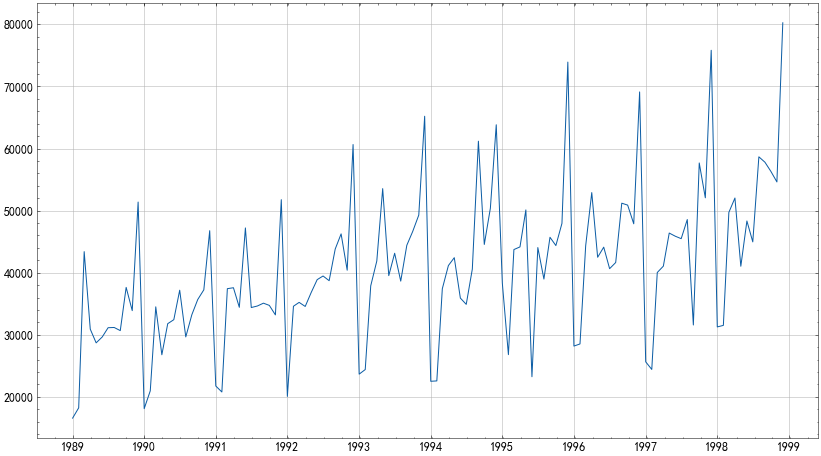

In [45]:
plt.plot(data)

In [79]:
from statsmodels.tsa.holtwinters import *
from statsmodels.tsa.stattools import *
from statsmodels.graphics import tsaplots
from statsmodels.tsa.stattools import adfuller as ADF  #平稳性检测

In [82]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [100]:
winter_model = ExponentialSmoothing(data).fit()

In [101]:
winter_model.summary()

Dep. Variable:,endog,No. Observations:,120
Model:,ExponentialSmoothing,SSE,14433566643.874
Optimized:,True,AIC,2236.640
Trend:,None,BIC,2242.215
Seasonal:,None,AICC,2236.987
Seasonal Periods:,None,Date:,"Mon, 06 Jul 2020"
Box-Cox:,False,Time:,17:50:47
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0890551,alpha,True
initial_level,30597.827,l.0,True


In [80]:
ADF(data)

(0.056278648307021485,
 0.96294610486617,
 11,
 108,
 {'1%': -3.4924012594942333,
  '5%': -2.8886968193364835,
  '10%': -2.5812552709190673},
 2201.725775896965)

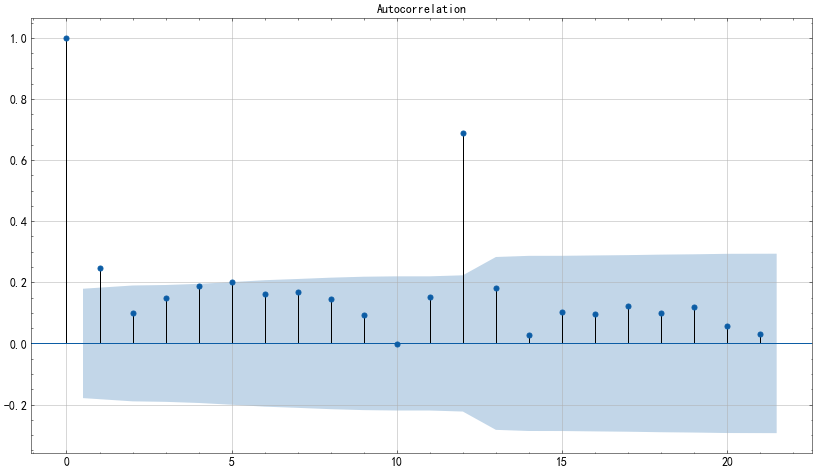

In [61]:
tsaplots.plot_acf(data).show()

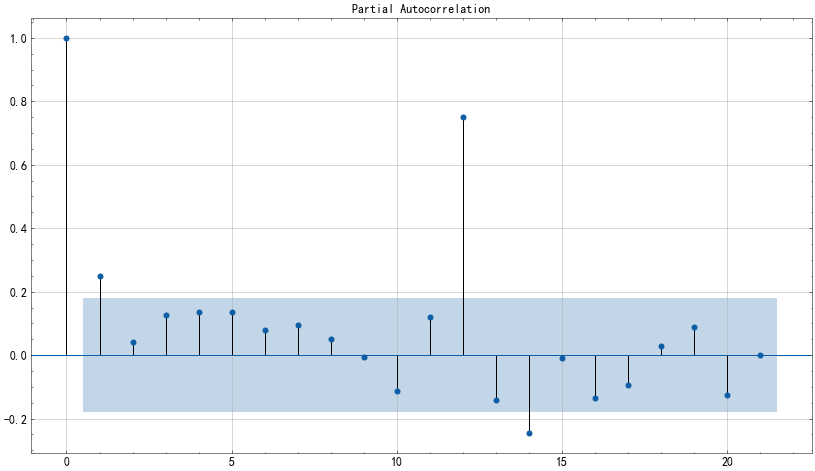

In [62]:
tsaplots.plot_pacf(data).show()

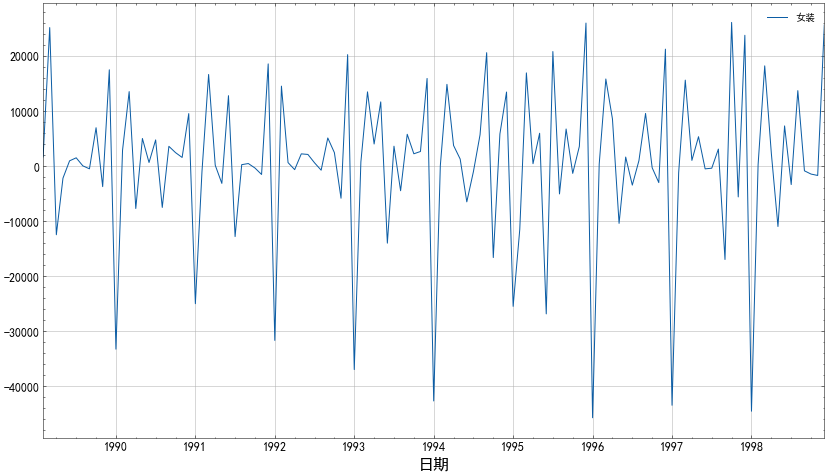

In [51]:
diff1 = data.diff().dropna()
diff1.plot()

In [81]:
ADF(diff1)

(-12.578131938865384,
 1.9369780703655084e-23,
 10,
 108,
 {'1%': -3.4924012594942333,
  '5%': -2.8886968193364835,
  '10%': -2.5812552709190673},
 2178.626923699069)

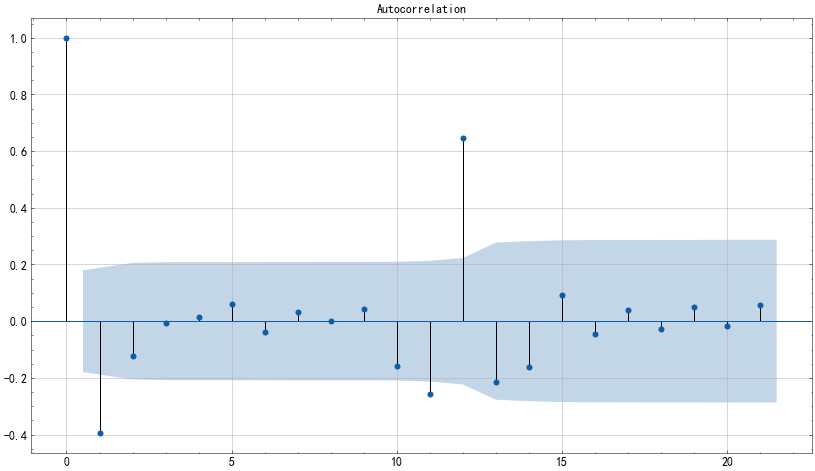

In [63]:
tsaplots.plot_acf(diff1).show()

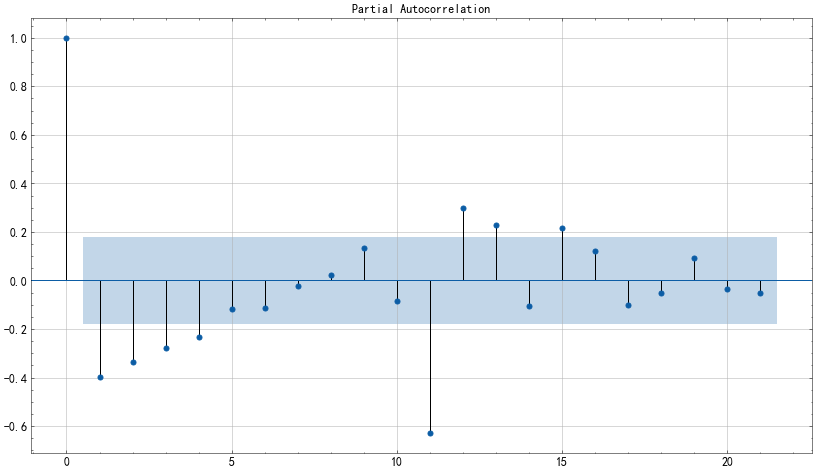

In [64]:
tsaplots.plot_pacf(diff1).show()

In [70]:
from statsmodels.tsa.seasonal import DecomposeResult, seasonal_decompose

In [71]:
decomposition = seasonal_decompose(data, period=12)

In [73]:
observed = decomposition.observed
seasonal = decomposition.seasonal
trend = decomposition.trend
resid = decomposition.resid
# weights = decomposition.weights

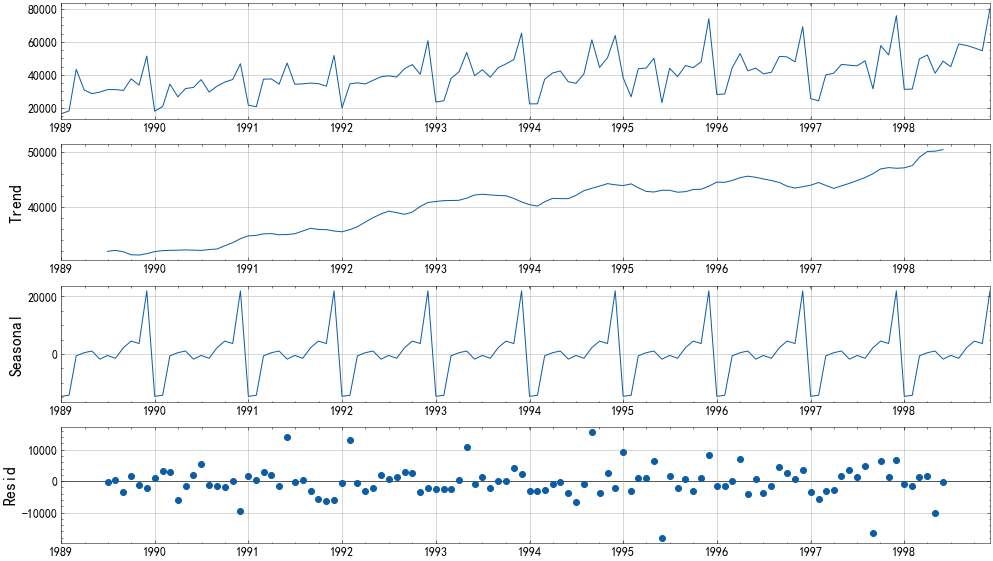

In [78]:
DecomposeResult(observed,seasonal,trend,resid).plot().show()